# A study about Covid. 

## 1
For this test, take the Mexican government database of deaths from Covid during 2020. This complete data is found in the following link:
(http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip).
 
By having too many observations a standard computer will take too long for an exploratory analysis, so a random sample of 100,000 observations was obtained.

I consider this topic important and current, since the information is scarce and it is also important to know if the decisions about this disease were adequate.

In [1]:
# Libraries
import pandas as pd # Library Pandas
import numpy as np # Library Numpy
import matplotlib.pyplot as plt # to make graph
import seaborn as sns 

%matplotlib inline

In [2]:
# Import data, we are importing a csv file 
df_covid = pd.read_csv("datos.csv", encoding='latin-1')

In [3]:
# Column names
np.array(df_covid.columns).reshape(5,8)

array([['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR',
        'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES'],
       ['MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO',
        'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD'],
       ['NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
        'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR'],
       ['HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
        'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'TOMA_MUESTRA_LAB'],
       ['RESULTADO_LAB', 'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO',
        'CLASIFICACION_FINAL', 'MIGRANTE', 'PAIS_NACIONALIDAD',
        'PAIS_ORIGEN', 'UCI']], dtype=object)

In [4]:
# Eliminate the null observations, 
# in this case we delete them since the person recovered or the death was not registered
df_covid = df_covid.dropna()

In [5]:
# According to the catalog of nomenclatures, the data, 1,2 and 3
# correspond to cases registered as deaths
df_covid = df_covid[(df_covid.CLASIFICACION_FINAL == 1) | (df_covid.CLASIFICACION_FINAL == 2) | (df_covid.CLASIFICACION_FINAL == 3) ]
df_covid

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
94,2020-12-25,17c85e,2,12,15,1,15,15,70,2,...,1,1,1,2,97,3,99,MÃ©xico,97,1
142,2020-12-25,393aa3,1,4,32,1,32,32,10,2,...,2,1,1,2,97,3,99,MÃ©xico,97,2
313,2020-12-25,21d8cf,1,12,22,2,22,22,14,2,...,1,1,1,1,2,3,99,MÃ©xico,97,2
367,2020-12-25,3ce1a8,1,4,13,2,13,13,51,2,...,2,1,1,2,97,3,99,MÃ©xico,97,2
415,2020-12-25,1298c5,2,12,24,2,24,24,16,1,...,2,1,1,2,97,3,99,MÃ©xico,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99885,2020-12-25,048745,1,4,2,2,18,2,2,2,...,99,1,1,2,97,3,99,MÃ©xico,97,2
99890,2020-12-25,353602,2,6,9,1,9,9,17,2,...,2,1,1,2,97,3,99,MÃ©xico,97,2
99896,2020-12-25,274426,2,4,8,1,8,8,32,2,...,2,1,1,2,97,3,99,MÃ©xico,97,2
99917,2020-12-25,2fd181,2,4,26,2,26,26,29,2,...,2,1,1,2,97,3,99,MÃ©xico,97,2


In [6]:
# The rows and columns of the previous filters
df_covid.shape

(3564, 40)

In [7]:
# Data preview
df_covid.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
94,2020-12-25,17c85e,2,12,15,1,15,15,70,2,...,1,1,1,2,97,3,99,MÃ©xico,97,1
142,2020-12-25,393aa3,1,4,32,1,32,32,10,2,...,2,1,1,2,97,3,99,MÃ©xico,97,2
313,2020-12-25,21d8cf,1,12,22,2,22,22,14,2,...,1,1,1,1,2,3,99,MÃ©xico,97,2
367,2020-12-25,3ce1a8,1,4,13,2,13,13,51,2,...,2,1,1,2,97,3,99,MÃ©xico,97,2
415,2020-12-25,1298c5,2,12,24,2,24,24,16,1,...,2,1,1,2,97,3,99,MÃ©xico,97,97


In [8]:
# Basic data statistics. Recognize the situation of the data.
df_covid.describe

<bound method NDFrame.describe of       FECHA_ACTUALIZACION ID_REGISTRO  ORIGEN  SECTOR  ENTIDAD_UM  SEXO  \
94             2020-12-25      17c85e       2      12          15     1   
142            2020-12-25      393aa3       1       4          32     1   
313            2020-12-25      21d8cf       1      12          22     2   
367            2020-12-25      3ce1a8       1       4          13     2   
415            2020-12-25      1298c5       2      12          24     2   
...                   ...         ...     ...     ...         ...   ...   
99885          2020-12-25      048745       1       4           2     2   
99890          2020-12-25      353602       2       6           9     1   
99896          2020-12-25      274426       2       4           8     1   
99917          2020-12-25      2fd181       2       4          26     2   
99995          2020-12-25      0f5411       2       4          30     2   

       ENTIDAD_NAC  ENTIDAD_RES  MUNICIPIO_RES  TIPO_PACIENTE  ..

In [9]:
# Correlation matrix.
#corrmat = df_covid.corr()

In [10]:
# Heat map
# f, ax = plt.subplots(figsize = (12,9))
#sns.heatmap(corrmat, vmax = .8, square = True)

## 2 Correlation plot

In [11]:
# Let's concatenate the two columns of interest
data = pd.concat([df_covid["FECHA_SINTOMAS"],df_covid["EDAD"]], axis= 1)

In [12]:
# Compose the dates in chronological order
data = data.sort_values('FECHA_SINTOMAS', ascending = True)

In [13]:
# Data preview
data.head()

,FECHA_SINTOMAS,EDAD
896,2020-03-14,57
49762,2020-03-16,56
60609,2020-03-16,82
66806,2020-03-16,49
23496,2020-03-20,81


<AxesSubplot:xlabel='FECHA_SINTOMAS', ylabel='EDAD'>

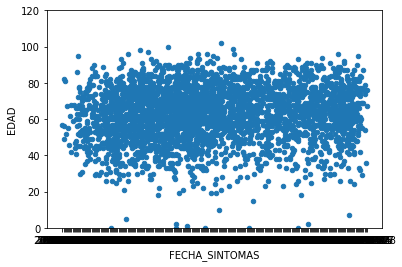

In [14]:
# Correlation graph
data.plot.scatter(x = "FECHA_SINTOMAS" , y = "EDAD", ylim=(0,120))

Remarks: We decided to give these two variables to show a scatterplot. No apparent correlation is observed. We reaffirm with the calculation of the correlation matrix and the heat map to graphically show this dependency. In addition, although there is no correlation, it is to be expected, between the date of infection and the relationship to age, there should be no information about the infection. Marking the importance of sanitary confinement. In addition, it is shown that age alone is not enough to describe the development of the disease, but later we will see that it is important for vaccination. In the heat map, a table is observed on respiratory and cardiac diseases, with an evident correlation. However, we do not show it because it makes it more interesting for us to see the relationship between smoking (which is between said table) and the age of the deceased. To evidence the decisions on the form of vaccination.

## 3 visualization about the information

In [15]:
# Let's make the "TABAQUISMO" variable a categorical
df_covid["TABAQUISMO"] = df_covid["TABAQUISMO"].astype("category")

(-0.5, 2.5, 0.0, 120.0)

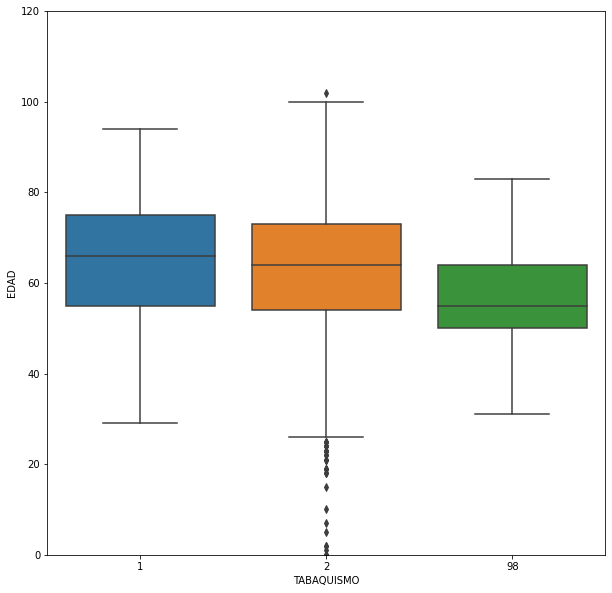

In [16]:
# Boxplot.
var = "TABAQUISMO"
f, ax = plt.subplots(figsize = (10,10)) # subplot
fig = sns.boxplot(x = var, y = "EDAD", data = df_covid) # gráfico de caja
fig.axis(ymin=0,ymax=120) # los parametro del eje y

Remarks:
The nomenclature dictionary indicates that "1" is a smoker, "2" is a non-smoker, and "98" is unknown. This concentrates a summary of the importance on which group of the population was more susceptible to not surviving the disease. The confinement was necessary to protect these groups in around 60 years or more. The importance of the sanitary confinement and the vaccination blocks were a decision taken adequately at least with this government database.

## 4 Machine learning algorithms

In research, many diseases have been modeled with neural networks, how different diseases spread as well as Lasso regression. There is also the logistic regression for rapid growth and stagnation in the spread of contagion.

## 5 Select one of the algorithms

In this case I would propose a logistic regression. A disease spreads between individuals at an exponential rate, giving a large contagion group in a short time, but as there are survivors they become immune, so the infections become less and less, this can be seen in the data as peak or waves of infections.

Logistic regression adapts to these behaviors, as a method of machine learning, inference and supervised. I would propose continuing with the variables studied, such as cardio-respiratory variables with deaths and the estimated duration of this disease. In addition, now that there is vaccination, it would be important to know if there is immunity due to disease or vaccination and the duration. How to also know, how many infections are to be expected in case the vaccination is not enough in the face of the variants.

## 6 Flowchart

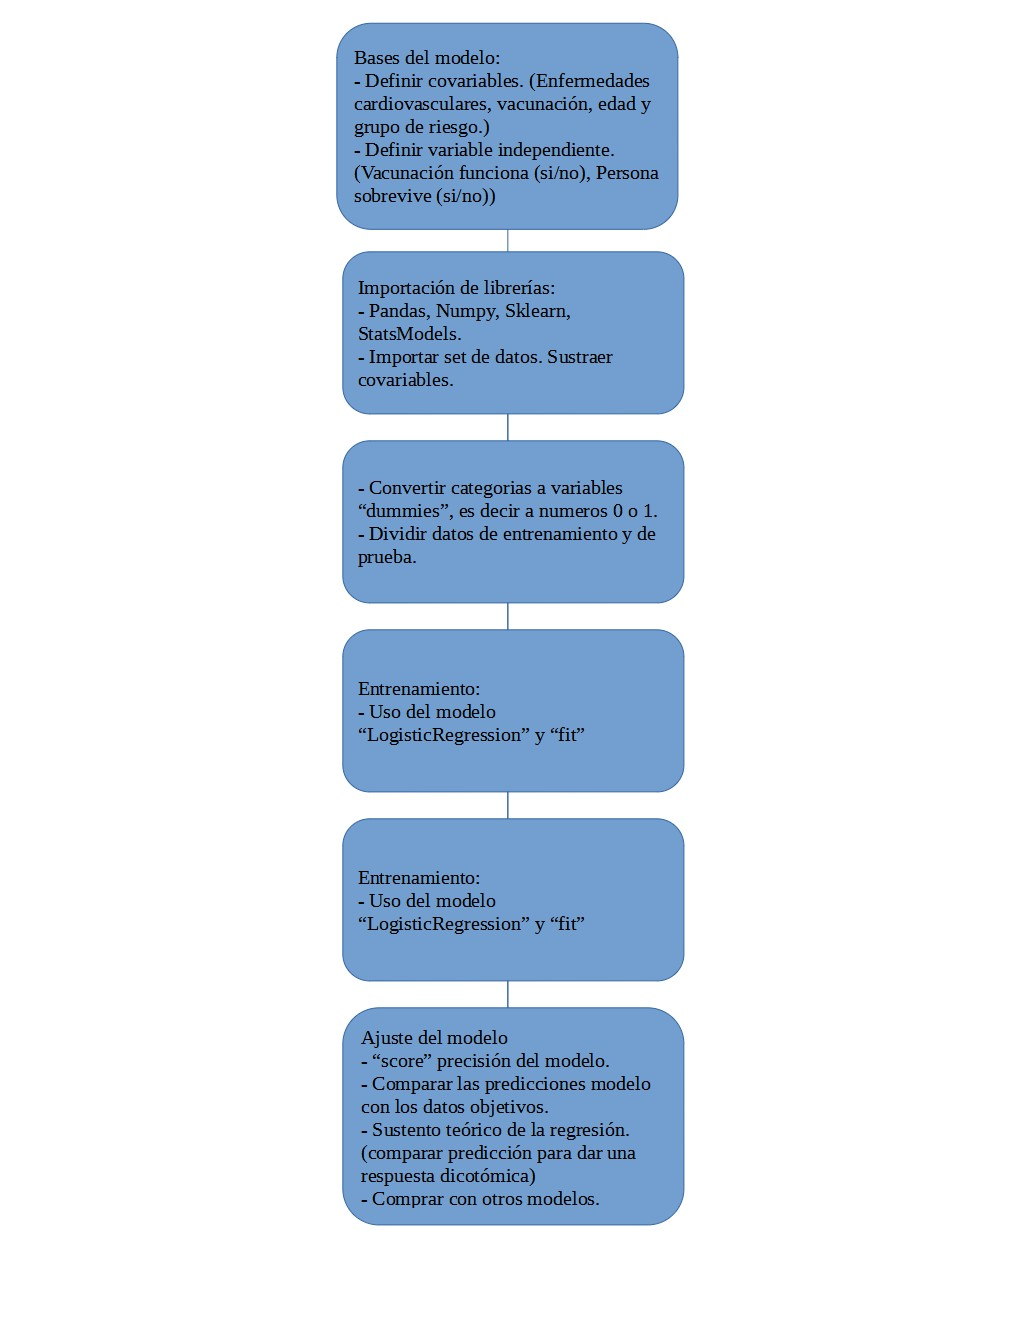

## 7 Frameworks and libraries
In this case you would use
- Numpy,
- Pandas,
- Matplotlib,
- Scikit-learn,
- StatsModels.

It is difficult to give an estimate, since the model is simple, I consider important the import and collection of data an important part. So this could be a project of at least 6 months. The important thing is that as the data fills in you could see a gradual change in the model. Since many countries are putting their data online.

## 8
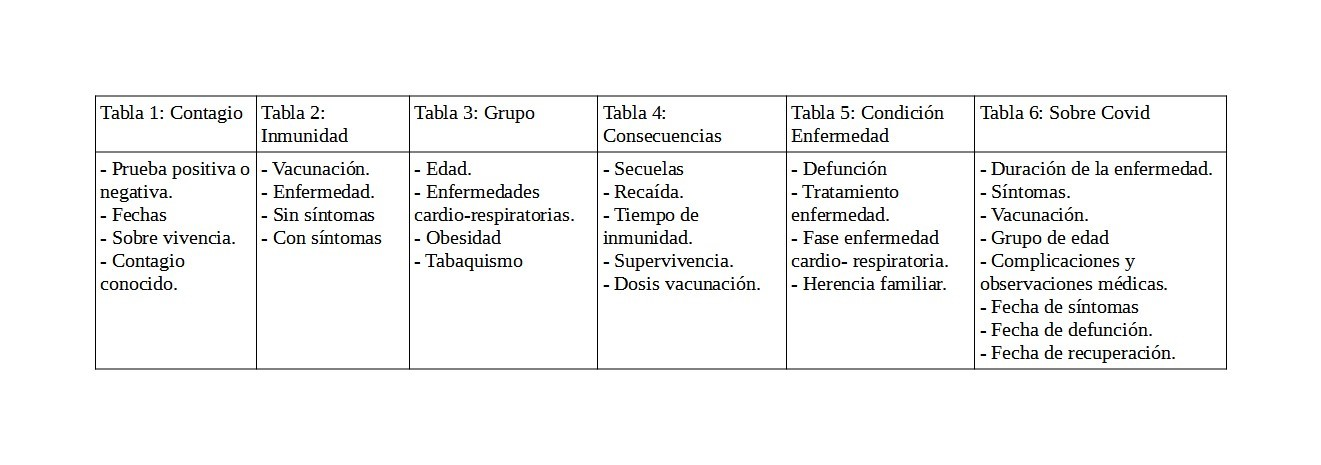